In [103]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline

In [104]:
# tend = 10
tend = 2
dt = 0.003
dx = 0.1 
L = 10
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi =  0.9 

In [105]:
ftc = PorousMediaLab(L, dx, tend, dt, phi)

In [106]:
C_init=0.0000001/phi/3
ftc.add_species(is_solute=True, element='H2CO3', D=4, init_C=C_init, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='dirichlet')
ftc.add_species(is_solute=True, element='HCO3', D=4, init_C=C_init, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='dirichlet')
ftc.add_species(is_solute=True, element='CO3', D=4, init_C=C_init, bc_top=1e-3, bc_top_type='dirichlet', bc_bot=0, bc_bot_type='dirichlet')

ftc.add_acid(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])


ftc.add_species(is_solute=True, element='H2SO4', D=4, init_C=C_init,  bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='dirichlet')
ftc.add_species(is_solute=True, element='HSO4',  D=4, init_C=C_init,  bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='dirichlet')
ftc.add_species(is_solute=True, element='SO4',  D=4, init_C=C_init,  bc_top=1e-3, bc_top_type='dirichlet', bc_bot=0, bc_bot_type='dirichlet')

ftc.add_acid(species=['H2SO4', 'HSO4', 'SO4'], pKa=[-10, 1.99])

ftc.add_species(is_solute=True, element='Ca', D=4, init_C=1e-9, bc_top=0., bc_top_type='dirichlet', bc_bot=1e-4, bc_bot_type='flux')
ftc.add_species(is_solute=False, element='CaCO3', D=1e-2, init_C=0., bc_top=0.0, bc_top_type='flux', bc_bot=0.00, bc_bot_type='flux')
ftc.add_species(is_solute=False, element='CaSO4', D=1e-2, init_C=0., bc_top=0.0, bc_top_type='flux', bc_bot=0.00, bc_bot_type='flux')


ftc.add_ion(element='Ca', charge=2)

In [107]:
ftc.constants['Ks_CaCO3'] = 8e-9
ftc.constants['Ks_CaSO4'] = 2.4e-9
ftc.constants['k_pre'] = 1e-2
ftc.constants['CF'] = (1-phi)/phi  ### conversion factor



In [108]:
ftc.rates['R_pre_CaCO3'] = 'k_pre * tanh(Ca*CO3/Ks_CaCO3-1)'
ftc.rates['R_pre_CaSO4'] = 'k_pre * tanh(Ca*SO4/Ks_CaSO4-1)'
# ftc.rates['R_pre_CaCO3'] = '-k_pre * 10**(-pH) * tanh(1-Ca*CO3/Ks_CaCO3)'
# ftc.rates['R_pre_CaSO4'] = 'k_pre * SO4 * tanh(Ca*SO4/Ks_CaSO4-1)'

In [109]:
ftc.dcdt['CaCO3'] = 'R_pre_CaCO3/CF'
ftc.dcdt['Ca'] = '-R_pre_CaCO3*CF  - R_pre_CaSO4*CF'
ftc.dcdt['CO3'] = '-R_pre_CaCO3*CF'
ftc.dcdt['CaSO4'] = 'R_pre_CaSO4/CF'
ftc.dcdt['SO4'] = '-R_pre_CaSO4*CF'

In [110]:
# %%timeit
ftc.solve()

Simulation starts  with following params:
	tend = 2.0,
	dt = 3.00e-03,
	L = 10.0,
	dx = 1.00e-01,
	w = 0.00
Simulation started:
	 2017-08-15 23:03:53


Estimated time of the code execution:
	 0h:00m:23s
Will finish approx.:
	 2017-08-15 23:04:20


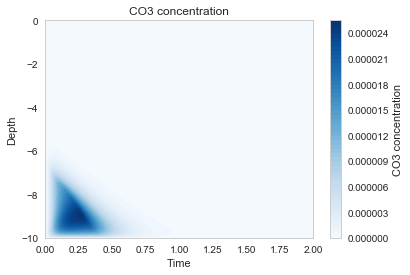

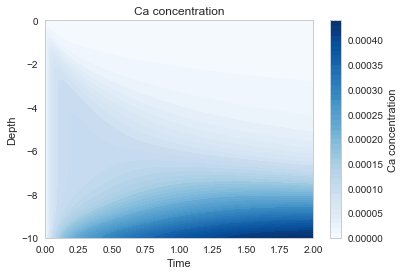

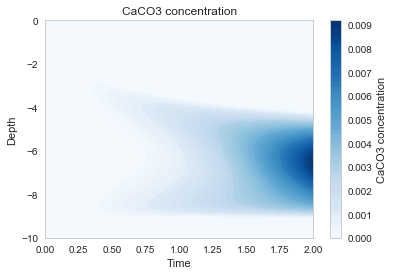

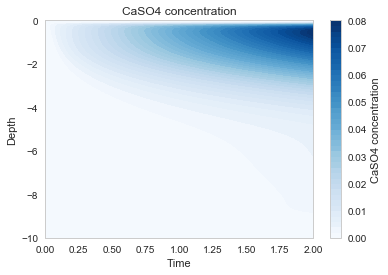

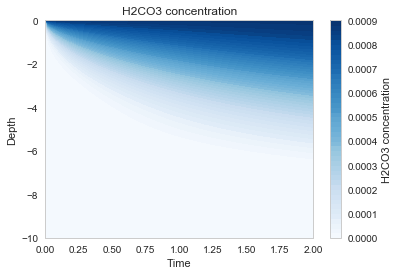

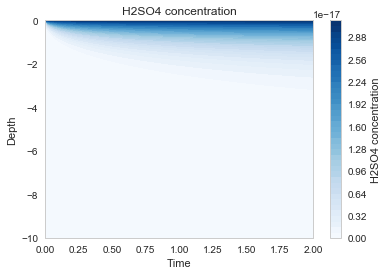

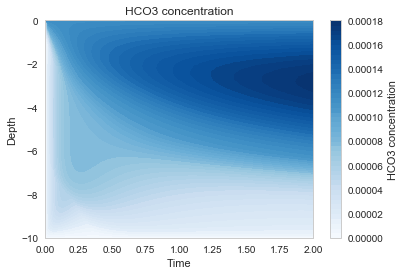

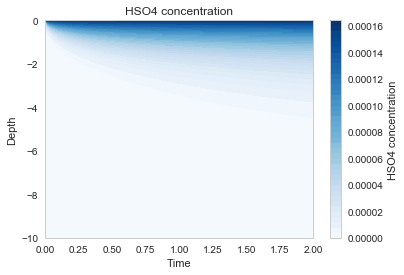

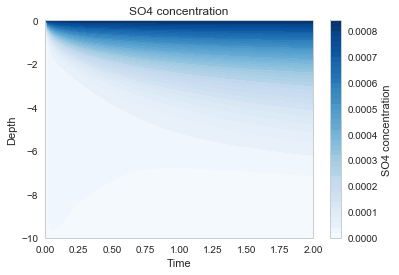

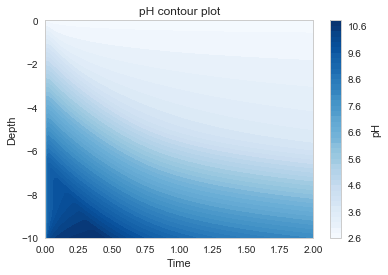

In [111]:
ftc.plot_contourplots(labels=False)

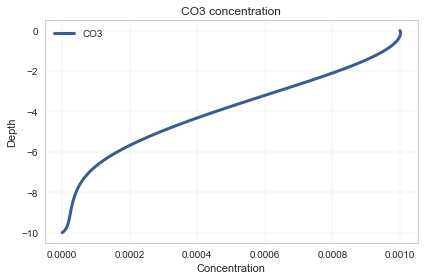

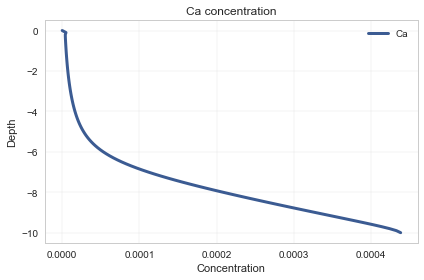

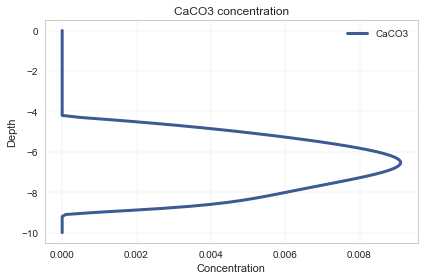

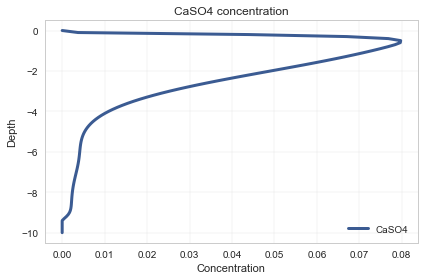

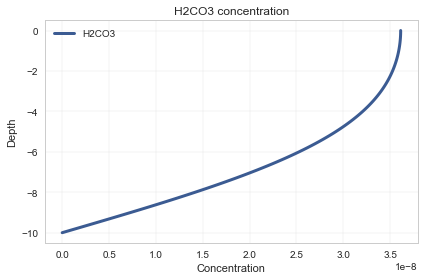

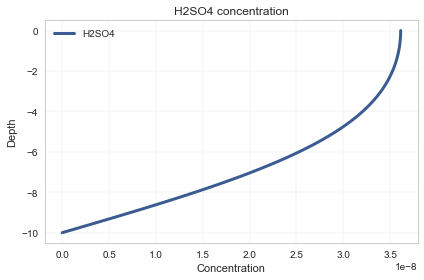

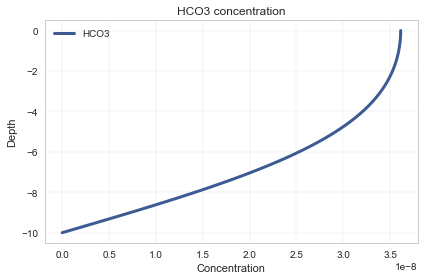

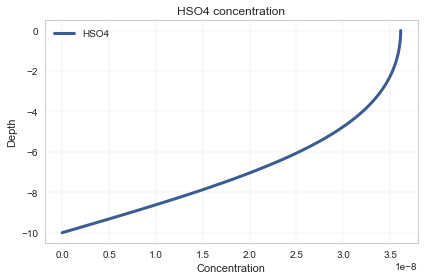

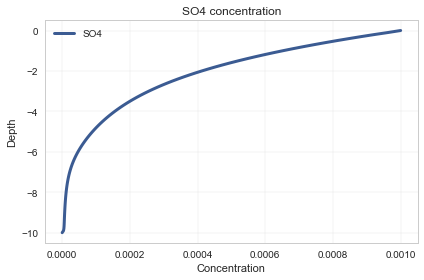

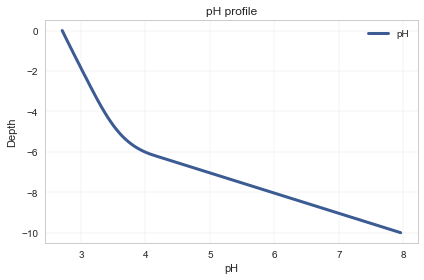

In [112]:
ftc.plot_profiles()

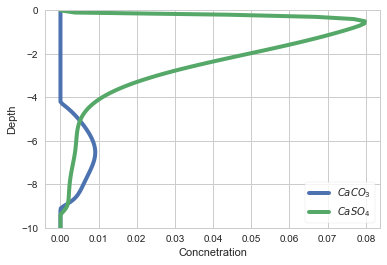

In [113]:
plt.plot(ftc.profiles.CaCO3, -ftc.x , label='$CaCO_3$', lw=4)
plt.plot(ftc.profiles.CaSO4, -ftc.x , label='$CaSO_4$', lw=4)
# plt.xlim(-.0,0.1)
plt.ylim(-10,0.0)
# plt.axvline(0, c='k', ls='-.')
plt.ylabel('Depth')
plt.xlabel('Concnetration')
plt.legend(frameon=1)

### Saturation indeces at the end of the simulation

/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10


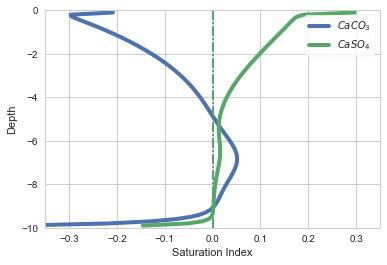

In [114]:
import seaborn as sns
plt.plot(np.log10(ftc.profiles.Ca*ftc.profiles.CO3/ftc.constants['Ks_CaCO3']), -ftc.x , c=sns.color_palette("deep", 10)[0], label='$CaCO_3$', lw=4)
plt.xlim(-.35,0.35)
plt.ylim(-10,0.0)
plt.axvline(0, ls='-.', c=sns.color_palette("deep", 10)[0])
plt.ylabel('Depth')
plt.xlabel('Saturation Index')
plt.legend(frameon=1)
plt.plot(np.log10(ftc.profiles.Ca*ftc.profiles.SO4/ftc.constants['Ks_CaSO4']), -ftc.x, c=sns.color_palette("deep", 10)[1], label='$CaSO_4$', lw=4)
plt.xlim(-.35,0.35)
plt.ylim(-10,0.0)
plt.axvline(0, ls='-.', c=sns.color_palette("deep", 10)[1])
plt.ylabel('Depth')
plt.xlabel('Saturation Index')
plt.legend(frameon=1)

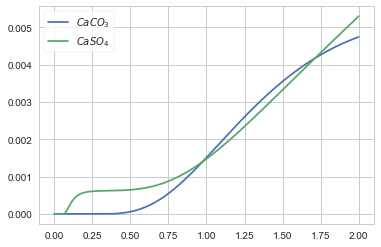

In [115]:
# plt.plot(ftc.time, ftc.Ca.concentration[50,:], label='Ca')
plt.plot(ftc.time, ftc.CaCO3.concentration[50,:], label='$CaCO_3$')
plt.plot(ftc.time, ftc.CaSO4.concentration[50,:], label='$CaSO_4$')
plt.legend(frameon=1)

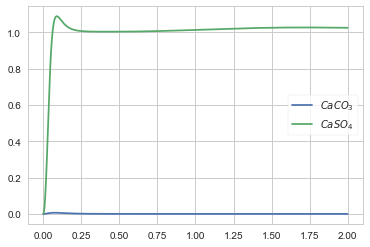

In [116]:
# plt.plot(ftc.time, ftc.Ca.concentration[50,:], label='Ca')
plt.plot(ftc.time, ftc.Ca.concentration[60,:]*ftc.CO3.concentration[60,:]/ftc.constants['Ks_CaCO3'], label='$CaCO_3$')
plt.plot(ftc.time, ftc.Ca.concentration[60,:]*ftc.SO4.concentration[60,:]/ftc.constants['Ks_CaSO4'], label='$CaSO_4$')
plt.legend(frameon=1)

In [117]:
>>> from pHcalc import Acid, Neutral, System
>>> carbonic = Acid(pKa=[3.6, 10.32], charge=0, conc=0.0000001)
>>> system = System(carbonic)
>>> system.pHsolve()
>>> print(system.pH) # Should print 2.8343772

6.79108200073
